In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import numpy
import torchvision

train = torchvision.datasets.MNIST('mnist', train = True, download = False)
test = torchvision.datasets.MNIST('mnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

### 1

In [3]:
import gtda.homology

persistence = gtda.homology.CubicalPersistence(n_jobs = -1)
train_diagrams = persistence.fit_transform(train_images)
test_diagrams = persistence.transform(test_images)

100%|██████████| 10000/10000 [00:01<00:00, 7165.84it/s]


In [4]:
import cvtda.topology

to_features = cvtda.topology.DiagramsToFeatures(n_bins = 64, batch_size = 3650)
train_features = to_features.fit_transform(train_diagrams)
test_features = to_features.transform(test_diagrams)

Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]


Fitting complete


Batch:   0%|          | 0/17 [00:00<?, ?it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Batch: 100%|██████████| 3/3 [00:12<00:00,  4.20s/it]


In [5]:
import gtda.images

inverter = gtda.images.Inverter()
inv_train_images = inverter.fit_transform(train_images)
inv_test_images = inverter.transform(test_images)

In [6]:
persistence = gtda.homology.CubicalPersistence(n_jobs = -1)
inv_train_diagrams = persistence.fit_transform(inv_train_images)
inv_test_diagrams = persistence.transform(inv_test_images)

100%|██████████| 10000/10000 [00:01<00:00, 6434.90it/s]


In [7]:
to_features = cvtda.topology.DiagramsToFeatures(n_bins = 64, batch_size = 3650)
inv_train_features = to_features.fit_transform(inv_train_diagrams)
inv_test_features = to_features.transform(inv_test_diagrams)

Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


Fitting complete


Batch: 100%|██████████| 3/3 [00:10<00:00,  3.55s/it]


In [8]:
train = numpy.hstack([ train_features, inv_train_features ])
test = numpy.hstack([ test_features, inv_test_features ])

train.shape, test.shape

((60000, 520), (10000, 520))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3785, 'TOP-2 Accuracy': 0.5759, 'TOP-3 Accuracy': 0.7151, 'TOP-4 Accuracy': 0.8192, 'TOP-5 Accuracy': 0.9, 'TOP-6 Accuracy': 0.954, 'TOP-7 Accuracy': 0.9735, 'TOP-8 Accuracy': 0.9865, 'TOP-9 Accuracy': 0.9946, 'AUC-ROC': 0.8138619155333183, 'Precision': 0.3778803703231772, 'Recall': 0.37395987481005355, 'F1-score': 0.3616832900231414}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4006, 'TOP-2 Accuracy': 0.6073, 'TOP-3 Accuracy': 0.7376, 'TOP-4 Accuracy': 0.8307, 'TOP-5 Accuracy': 0.9054, 'TOP-6 Accuracy': 0.9549, 'TOP-7 Accuracy': 0.9737, 'TOP-8 Accuracy': 0.9849, 'TOP-9 Accuracy': 0.995, 'AUC-ROC': 0.8217138631776658, 'Precision': 0.39546928556393907, 'Recall': 0.39697192740185516, 'F1-score': 0.38862423424661846}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000021F0CCFF340>
Input to La

100%|██████████| 25/25 [00:38<00:00,  1.53s/it, loss=1.25e+5, val_acc=0.368]


{'classifier': 'NNClassifier', 'Accuracy': 0.3685, 'TOP-2 Accuracy': 0.5531, 'TOP-3 Accuracy': 0.7013, 'TOP-4 Accuracy': 0.7897, 'TOP-5 Accuracy': 0.8432, 'TOP-6 Accuracy': 0.865, 'TOP-7 Accuracy': 0.8973, 'TOP-8 Accuracy': 0.965, 'TOP-9 Accuracy': 0.9882, 'AUC-ROC': 0.787350952668433, 'Precision': 0.3599428527413423, 'Recall': 0.3629641856234067, 'F1-score': 0.3285494281543887}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4086, 'TOP-2 Accuracy': 0.6095, 'TOP-3 Accuracy': 0.7404, 'TOP-4 Accuracy': 0.8393, 'TOP-5 Accuracy': 0.9166, 'TOP-6 Accuracy': 0.9675, 'TOP-7 Accuracy': 0.9844, 'TOP-8 Accuracy': 0.9931, 'TOP-9 Accuracy': 0.9985, 'AUC-ROC': 0.8329416458458694, 'Precision': 0.41311403392626744, 'Recall': 0.4029428941539853, 'F1-score': 0.3813337604811483}
Fitting <catboost.core.CatBoostClassifier object at 0x0000021F0CCFF460>
Learning ra

d:\Programs\Programming\Python\lib\site-packages\xgboost\core.py:158: UserWarning: [22:54:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


{'classifier': 'XGBClassifier', 'Accuracy': 0.414, 'TOP-2 Accuracy': 0.6167, 'TOP-3 Accuracy': 0.7487, 'TOP-4 Accuracy': 0.8439, 'TOP-5 Accuracy': 0.918, 'TOP-6 Accuracy': 0.969, 'TOP-7 Accuracy': 0.9858, 'TOP-8 Accuracy': 0.9946, 'TOP-9 Accuracy': 0.9988, 'AUC-ROC': 0.8370899970023032, 'Precision': 0.4178124440109235, 'Recall': 0.40862931526227175, 'F1-score': 0.3886970376909124}


,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3785,0.5759,0.7151,0.8192,0.9000,0.9540,0.9735,0.9865,0.9946,0.813862,0.377880,0.373960,0.361683
1,RandomForestClassifier,0.4006,0.6073,0.7376,0.8307,0.9054,0.9549,0.9737,0.9849,0.9950,0.821714,0.395469,0.396972,0.388624
2,NNClassifier,0.3685,0.5531,0.7013,0.7897,0.8432,0.8650,0.8973,0.9650,0.9882,0.787351,0.359943,0.362964,0.328549
3,HistGradientBoostingClassifier,0.4086,0.6095,0.7404,0.8393,0.9166,0.9675,0.9844,0.9931,0.9985,0.832942,0.413114,0.402943,0.381334
4,CatBoostClassifier,0.4137,0.6265,0.7576,0.8492,0.9214,0.9707,0.9865,0.9950,0.9990,0.841747,0.410023,0.409057,0.395535
5,XGBClassifier,0.4140,0.6167,0.7487,0.8439,0.9180,0.9690,0.9858,0.9946,0.9988,0.837090,0.417812,0.408629,0.388697


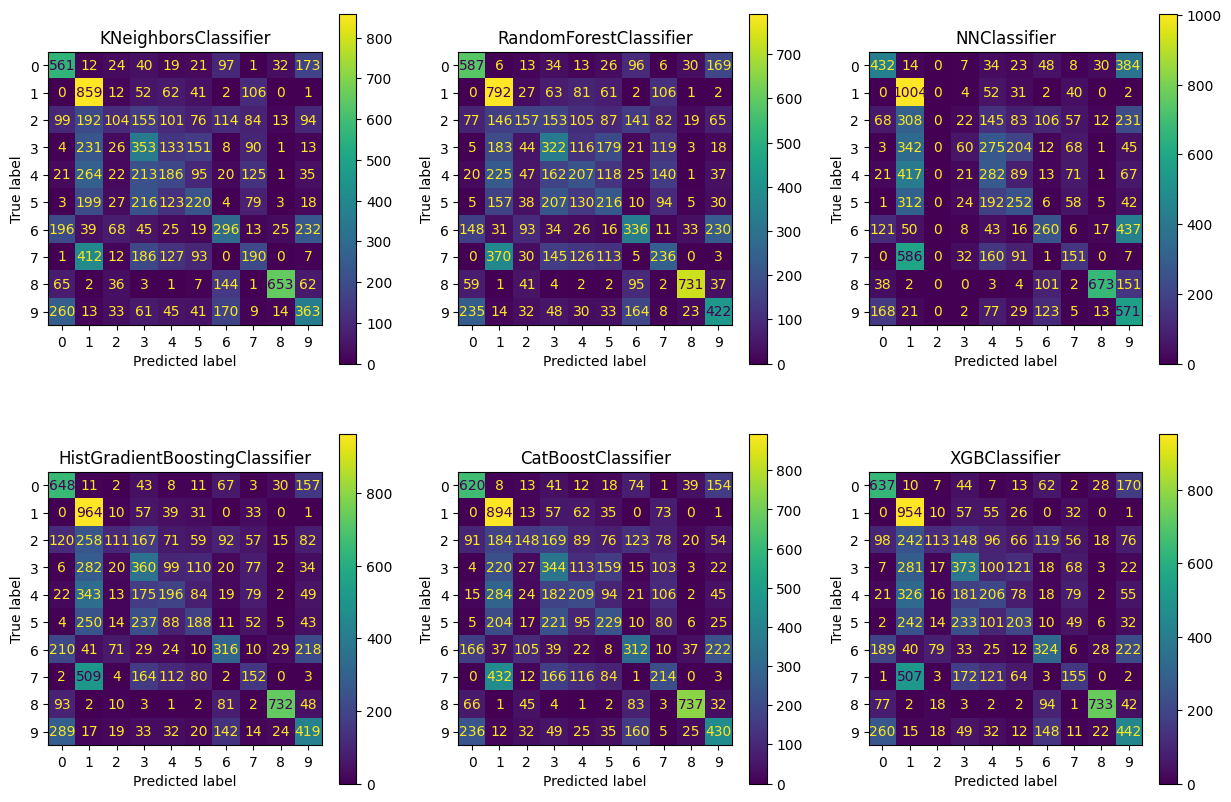

In [9]:
import cvtda.classification

cvtda.classification.classify(train, train_labels, test, test_labels)

In [10]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train = selected_standard_scaler.fit_transform(train)
test = selected_standard_scaler.transform(test)

train.shape, test.shape

((60000, 520), (10000, 520))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.396, 'TOP-2 Accuracy': 0.5969, 'TOP-3 Accuracy': 0.7269, 'TOP-4 Accuracy': 0.8271, 'TOP-5 Accuracy': 0.907, 'TOP-6 Accuracy': 0.9564, 'TOP-7 Accuracy': 0.976, 'TOP-8 Accuracy': 0.9852, 'TOP-9 Accuracy': 0.9934, 'AUC-ROC': 0.8209826719318315, 'Precision': 0.39367194455327287, 'Recall': 0.39166017173117956, 'F1-score': 0.37786240871613336}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4039, 'TOP-2 Accuracy': 0.6073, 'TOP-3 Accuracy': 0.7358, 'TOP-4 Accuracy': 0.828, 'TOP-5 Accuracy': 0.9011, 'TOP-6 Accuracy': 0.9526, 'TOP-7 Accuracy': 0.9737, 'TOP-8 Accuracy': 0.9867, 'TOP-9 Accuracy': 0.9948, 'AUC-ROC': 0.8223405120418349, 'Precision': 0.4006880929843028, 'Recall': 0.40048408261146007, 'F1-score': 0.39296332956257685}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000021F11767790>
Input to 

100%|██████████| 25/25 [00:38<00:00,  1.54s/it, loss=1.23e+5, val_acc=0.409]


{'classifier': 'NNClassifier', 'Accuracy': 0.4095, 'TOP-2 Accuracy': 0.5969, 'TOP-3 Accuracy': 0.7255, 'TOP-4 Accuracy': 0.8031, 'TOP-5 Accuracy': 0.8578, 'TOP-6 Accuracy': 0.8814, 'TOP-7 Accuracy': 0.9101, 'TOP-8 Accuracy': 0.9429, 'TOP-9 Accuracy': 0.9809, 'AUC-ROC': 0.801791177657164, 'Precision': 0.37610063177159375, 'Recall': 0.40493992048463295, 'F1-score': 0.372346439694206}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4095, 'TOP-2 Accuracy': 0.6107, 'TOP-3 Accuracy': 0.741, 'TOP-4 Accuracy': 0.8405, 'TOP-5 Accuracy': 0.9164, 'TOP-6 Accuracy': 0.9684, 'TOP-7 Accuracy': 0.9843, 'TOP-8 Accuracy': 0.9932, 'TOP-9 Accuracy': 0.9985, 'AUC-ROC': 0.8336842839914251, 'Precision': 0.4128976566686636, 'Recall': 0.40404109108824304, 'F1-score': 0.38238740499686896}
Fitting <catboost.core.CatBoostClassifier object at 0x0000021F11767940>
Learning

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3960,0.5969,0.7269,0.8271,0.9070,0.9564,0.9760,0.9852,0.9934,0.820983,0.393672,0.391660,0.377862
1,RandomForestClassifier,0.4039,0.6073,0.7358,0.8280,0.9011,0.9526,0.9737,0.9867,0.9948,0.822341,0.400688,0.400484,0.392963
2,NNClassifier,0.4095,0.5969,0.7255,0.8031,0.8578,0.8814,0.9101,0.9429,0.9809,0.801791,0.376101,0.404940,0.372346
3,HistGradientBoostingClassifier,0.4095,0.6107,0.7410,0.8405,0.9164,0.9684,0.9843,0.9932,0.9985,0.833684,0.412898,0.404041,0.382387
4,CatBoostClassifier,0.4162,0.6238,0.7576,0.8515,0.9204,0.9705,0.9860,0.9951,0.9990,0.842404,0.413399,0.411630,0.398004
5,XGBClassifier,0.4137,0.6173,0.7478,0.8450,0.9167,0.9697,0.9859,0.9940,0.9986,0.836631,0.416205,0.408229,0.389225


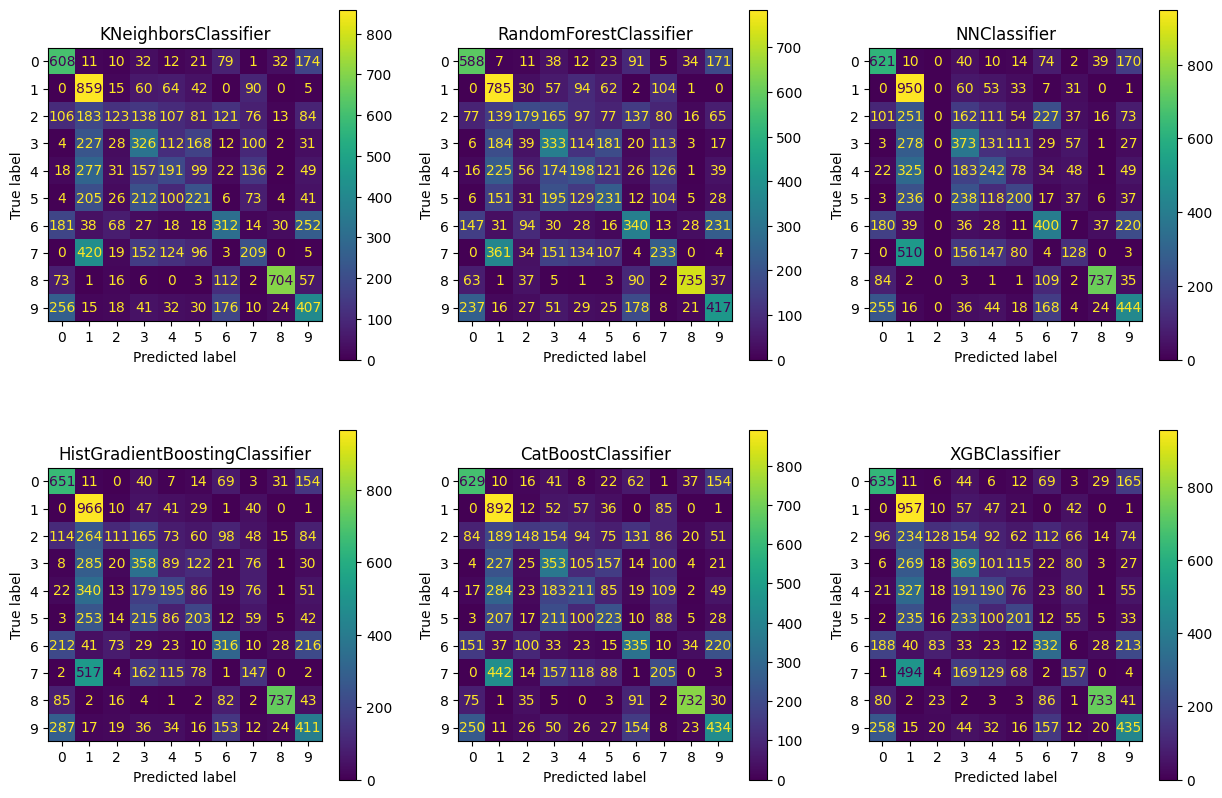

In [11]:
cvtda.classification.classify(train, train_labels, test, test_labels)

### 2

In [15]:
import gtda.images

filtration = gtda.images.Binarizer(threshold = 0.2)
train_images = filtration.fit_transform(train_images)
test_images = filtration.transform(test_images)

In [17]:
import gtda.images

filtration = gtda.images.HeightFiltration(direction = numpy.array([ 1, 1 ]))
train_images = filtration.fit_transform(train_images)
test_images = filtration.transform(test_images)

In [18]:
import gtda.homology

persistence = gtda.homology.CubicalPersistence(n_jobs = -1)
train_diagrams = persistence.fit_transform(train_images)
test_diagrams = persistence.transform(test_images)

100%|██████████| 10000/10000 [00:01<00:00, 7497.04it/s]


In [19]:
import cvtda.topology

to_features = cvtda.topology.DiagramsToFeatures(n_bins = 64, batch_size = 3650)
train_features = to_features.fit_transform(train_diagrams)
test_features = to_features.transform(test_diagrams)

Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 18.14it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00, 15.86it/s]


Fitting complete


Batch: 100%|██████████| 3/3 [00:11<00:00,  3.69s/it]


Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.6473, 'TOP-2 Accuracy': 0.8445, 'TOP-3 Accuracy': 0.9154, 'TOP-4 Accuracy': 0.9498, 'TOP-5 Accuracy': 0.9713, 'TOP-6 Accuracy': 0.9817, 'TOP-7 Accuracy': 0.9886, 'TOP-8 Accuracy': 0.994, 'TOP-9 Accuracy': 0.9974, 'AUC-ROC': 0.9306985341570827, 'Precision': 0.6541273847914203, 'Recall': 0.6457899102711935, 'F1-score': 0.6366526418083553}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.6755, 'TOP-2 Accuracy': 0.8607, 'TOP-3 Accuracy': 0.9226, 'TOP-4 Accuracy': 0.9516, 'TOP-5 Accuracy': 0.9677, 'TOP-6 Accuracy': 0.9793, 'TOP-7 Accuracy': 0.9873, 'TOP-8 Accuracy': 0.9935, 'TOP-9 Accuracy': 0.9961, 'AUC-ROC': 0.9328757212215273, 'Precision': 0.6805624925238473, 'Recall': 0.6744091605946286, 'F1-score': 0.6662854878660868}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000001BB02E63070>
Input to La

100%|██████████| 25/25 [00:37<00:00,  1.49s/it, loss=1.14e+5, val_acc=0.504]


{'classifier': 'NNClassifier', 'Accuracy': 0.5038, 'TOP-2 Accuracy': 0.7119, 'TOP-3 Accuracy': 0.8145, 'TOP-4 Accuracy': 0.8641, 'TOP-5 Accuracy': 0.8971, 'TOP-6 Accuracy': 0.9148, 'TOP-7 Accuracy': 0.9363, 'TOP-8 Accuracy': 0.9565, 'TOP-9 Accuracy': 0.9859, 'AUC-ROC': 0.8624276650478704, 'Precision': 0.5325788581435459, 'Recall': 0.5019160171933683, 'F1-score': 0.4775380978023963}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.6559, 'TOP-2 Accuracy': 0.8427, 'TOP-3 Accuracy': 0.9191, 'TOP-4 Accuracy': 0.9525, 'TOP-5 Accuracy': 0.9743, 'TOP-6 Accuracy': 0.9871, 'TOP-7 Accuracy': 0.9927, 'TOP-8 Accuracy': 0.9965, 'TOP-9 Accuracy': 0.999, 'AUC-ROC': 0.9348025521909265, 'Precision': 0.6659667881446877, 'Recall': 0.6548658379048446, 'F1-score': 0.6431223175364009}
Fitting <catboost.core.CatBoostClassifier object at 0x000001BB038EEE90>
Learning r

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.6473,0.8445,0.9154,0.9498,0.9713,0.9817,0.9886,0.9940,0.9974,0.930699,0.654127,0.645790,0.636653
1,RandomForestClassifier,0.6755,0.8607,0.9226,0.9516,0.9677,0.9793,0.9873,0.9935,0.9961,0.932876,0.680562,0.674409,0.666285
2,NNClassifier,0.5038,0.7119,0.8145,0.8641,0.8971,0.9148,0.9363,0.9565,0.9859,0.862428,0.532579,0.501916,0.477538
3,HistGradientBoostingClassifier,0.6559,0.8427,0.9191,0.9525,0.9743,0.9871,0.9927,0.9965,0.9990,0.934803,0.665967,0.654866,0.643122
4,CatBoostClassifier,0.6834,0.8744,0.9359,0.9631,0.9815,0.9898,0.9945,0.9982,0.9993,0.945337,0.694453,0.682203,0.673859
5,XGBClassifier,0.6711,0.8613,0.9312,0.9590,0.9768,0.9878,0.9928,0.9968,0.9989,0.941187,0.683163,0.669756,0.660284


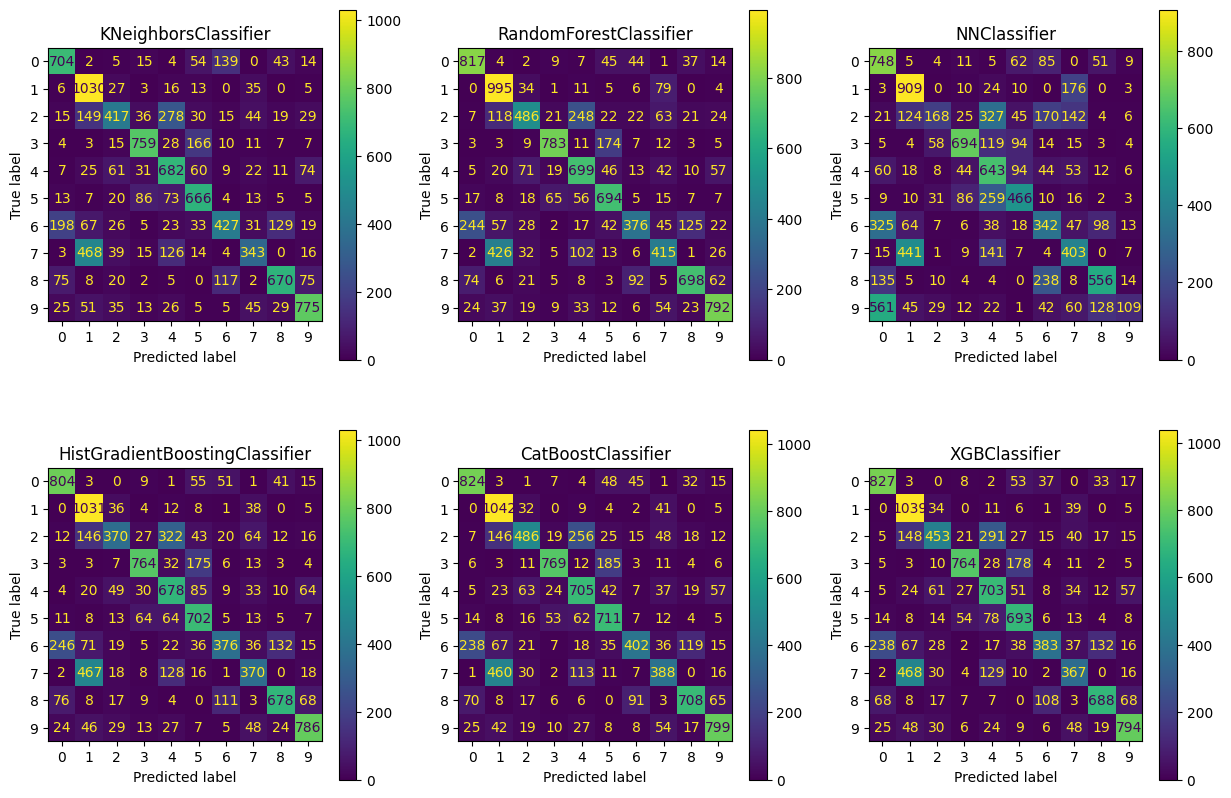

In [20]:
import cvtda.classification

cvtda.classification.classify(train_features, train_labels, test_features, test_labels)

In [21]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

train_features.shape, test_features.shape

((60000, 260), (10000, 260))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.6399, 'TOP-2 Accuracy': 0.8395, 'TOP-3 Accuracy': 0.912, 'TOP-4 Accuracy': 0.9476, 'TOP-5 Accuracy': 0.9682, 'TOP-6 Accuracy': 0.9797, 'TOP-7 Accuracy': 0.9867, 'TOP-8 Accuracy': 0.9923, 'TOP-9 Accuracy': 0.9966, 'AUC-ROC': 0.9279740662761905, 'Precision': 0.6436534027410914, 'Recall': 0.6379238308761218, 'F1-score': 0.6302757879206703}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.6762, 'TOP-2 Accuracy': 0.8612, 'TOP-3 Accuracy': 0.922, 'TOP-4 Accuracy': 0.9522, 'TOP-5 Accuracy': 0.9683, 'TOP-6 Accuracy': 0.9798, 'TOP-7 Accuracy': 0.9881, 'TOP-8 Accuracy': 0.9937, 'TOP-9 Accuracy': 0.9967, 'AUC-ROC': 0.9329260213822443, 'Precision': 0.6813894350663213, 'Recall': 0.6750959255353386, 'F1-score': 0.666834266678897}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000001BB034D8FD0>
Input to Lazy

100%|██████████| 25/25 [00:40<00:00,  1.62s/it, loss=1.12e+5, val_acc=0.631]


{'classifier': 'NNClassifier', 'Accuracy': 0.631, 'TOP-2 Accuracy': 0.7981, 'TOP-3 Accuracy': 0.872, 'TOP-4 Accuracy': 0.9061, 'TOP-5 Accuracy': 0.9275, 'TOP-6 Accuracy': 0.9478, 'TOP-7 Accuracy': 0.9651, 'TOP-8 Accuracy': 0.9771, 'TOP-9 Accuracy': 0.9886, 'AUC-ROC': 0.8941274507020547, 'Precision': 0.63608901647519, 'Recall': 0.6296205857989499, 'F1-score': 0.6211985285906682}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.6568, 'TOP-2 Accuracy': 0.8453, 'TOP-3 Accuracy': 0.9201, 'TOP-4 Accuracy': 0.9527, 'TOP-5 Accuracy': 0.9734, 'TOP-6 Accuracy': 0.9852, 'TOP-7 Accuracy': 0.992, 'TOP-8 Accuracy': 0.9963, 'TOP-9 Accuracy': 0.9989, 'AUC-ROC': 0.9345821473901336, 'Precision': 0.6672838539928361, 'Recall': 0.6558694067442838, 'F1-score': 0.6444253174815939}
Fitting <catboost.core.CatBoostClassifier object at 0x000001BB034D9180>
Learning rate 

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.6399,0.8395,0.9120,0.9476,0.9682,0.9797,0.9867,0.9923,0.9966,0.927974,0.643653,0.637924,0.630276
1,RandomForestClassifier,0.6762,0.8612,0.9220,0.9522,0.9683,0.9798,0.9881,0.9937,0.9967,0.932926,0.681389,0.675096,0.666834
2,NNClassifier,0.6310,0.7981,0.8720,0.9061,0.9275,0.9478,0.9651,0.9771,0.9886,0.894127,0.636089,0.629621,0.621199
3,HistGradientBoostingClassifier,0.6568,0.8453,0.9201,0.9527,0.9734,0.9852,0.9920,0.9963,0.9989,0.934582,0.667284,0.655869,0.644425
4,CatBoostClassifier,0.6834,0.8722,0.9352,0.9641,0.9812,0.9893,0.9941,0.9975,0.9990,0.945045,0.691819,0.682689,0.675124
5,XGBClassifier,0.6721,0.8619,0.9291,0.9586,0.9776,0.9875,0.9931,0.9964,0.9987,0.940972,0.684568,0.670749,0.661630


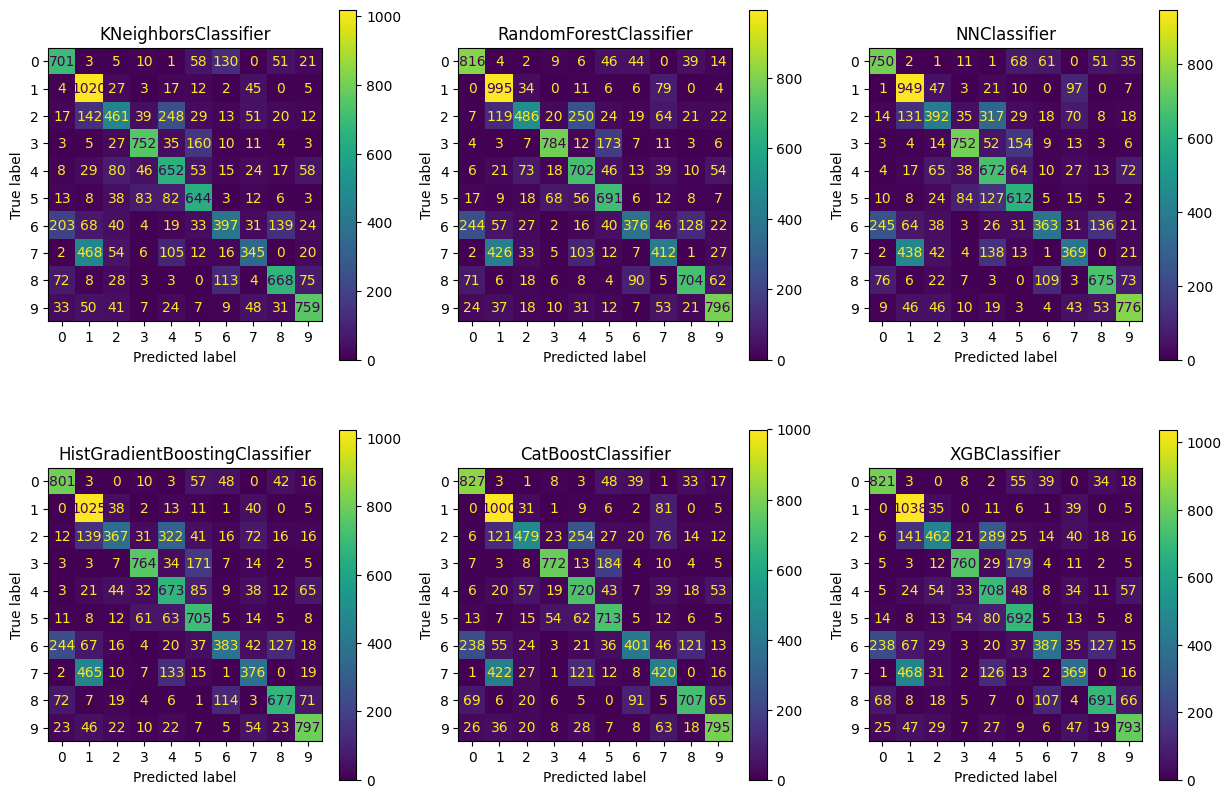

In [22]:
import cvtda.classification

cvtda.classification.classify(train_features, train_labels, test_features, test_labels)

### 3

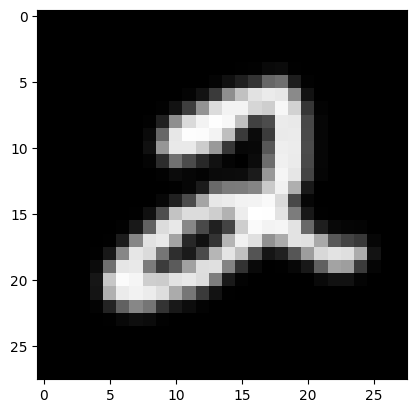

In [51]:
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

plt.imshow(ndimage.gaussian_filter(train_images[5], sigma=(0.5, 0.5), order=0), cmap = "gray")

In [43]:
train_images = numpy.array([ ndimage.gaussian_filter(img, sigma=(2, 2), order=0) for img in train_images ])
test_images = numpy.array([ ndimage.gaussian_filter(img, sigma=(2, 2), order=0) for img in test_images ])

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [38]:
import gtda.homology

persistence = gtda.homology.CubicalPersistence(n_jobs = -1)
train_diagrams = persistence.fit_transform(train_images)
test_diagrams = persistence.transform(test_images)

100%|██████████| 10000/10000 [00:01<00:00, 7821.70it/s]


In [39]:
import cvtda.topology

to_features = cvtda.topology.DiagramsToFeatures(n_bins = 64, batch_size = 3650)
train_features = to_features.fit_transform(train_diagrams)
test_features = to_features.transform(test_diagrams)

Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]


Fitting complete


Batch:   0%|          | 0/17 [00:00<?, ?it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Batch: 100%|██████████| 3/3 [00:11<00:00,  3.77s/it]


Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.5346, 'TOP-2 Accuracy': 0.7256, 'TOP-3 Accuracy': 0.8325, 'TOP-4 Accuracy': 0.9019, 'TOP-5 Accuracy': 0.9427, 'TOP-6 Accuracy': 0.9651, 'TOP-7 Accuracy': 0.981, 'TOP-8 Accuracy': 0.9905, 'TOP-9 Accuracy': 0.9972, 'AUC-ROC': 0.8886252225241261, 'Precision': 0.5394751845733179, 'Recall': 0.526671403929545, 'F1-score': 0.5233867346830265}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.66, 'TOP-2 Accuracy': 0.8175, 'TOP-3 Accuracy': 0.8959, 'TOP-4 Accuracy': 0.939, 'TOP-5 Accuracy': 0.9655, 'TOP-6 Accuracy': 0.9819, 'TOP-7 Accuracy': 0.9909, 'TOP-8 Accuracy': 0.9961, 'TOP-9 Accuracy': 0.999, 'AUC-ROC': 0.9304702705564877, 'Precision': 0.6504476349528504, 'Recall': 0.652981449652732, 'F1-score': 0.6499055637147078}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000001BB010049D0>
Input to LazyLine

100%|██████████| 25/25 [00:37<00:00,  1.49s/it, loss=1.18e+5, val_acc=0.371]


{'classifier': 'NNClassifier', 'Accuracy': 0.3711, 'TOP-2 Accuracy': 0.5799, 'TOP-3 Accuracy': 0.7361, 'TOP-4 Accuracy': 0.7927, 'TOP-5 Accuracy': 0.8281, 'TOP-6 Accuracy': 0.8742, 'TOP-7 Accuracy': 0.9109, 'TOP-8 Accuracy': 0.9391, 'TOP-9 Accuracy': 0.9671, 'AUC-ROC': 0.8393823106351332, 'Precision': 0.4045392821662002, 'Recall': 0.362794732969257, 'F1-score': 0.26388190411794277}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.6369, 'TOP-2 Accuracy': 0.806, 'TOP-3 Accuracy': 0.8878, 'TOP-4 Accuracy': 0.942, 'TOP-5 Accuracy': 0.9695, 'TOP-6 Accuracy': 0.9843, 'TOP-7 Accuracy': 0.9937, 'TOP-8 Accuracy': 0.9987, 'TOP-9 Accuracy': 0.9993, 'AUC-ROC': 0.9259635325831068, 'Precision': 0.6206540259156348, 'Recall': 0.6291626282347905, 'F1-score': 0.6187333078712115}
Fitting <catboost.core.CatBoostClassifier object at 0x000001BB01005690>
Learning ra

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.5346,0.7256,0.8325,0.9019,0.9427,0.9651,0.9810,0.9905,0.9972,0.888625,0.539475,0.526671,0.523387
1,RandomForestClassifier,0.6600,0.8175,0.8959,0.9390,0.9655,0.9819,0.9909,0.9961,0.9990,0.930470,0.650448,0.652981,0.649906
2,NNClassifier,0.3711,0.5799,0.7361,0.7927,0.8281,0.8742,0.9109,0.9391,0.9671,0.839382,0.404539,0.362795,0.263882
3,HistGradientBoostingClassifier,0.6369,0.8060,0.8878,0.9420,0.9695,0.9843,0.9937,0.9987,0.9993,0.925964,0.620654,0.629163,0.618733
4,CatBoostClassifier,0.6789,0.8338,0.9091,0.9532,0.9763,0.9891,0.9967,0.9990,0.9996,0.940498,0.669617,0.672031,0.668212
5,XGBClassifier,0.6509,0.8194,0.8974,0.9461,0.9712,0.9860,0.9948,0.9990,0.9996,0.932863,0.639410,0.643686,0.637275


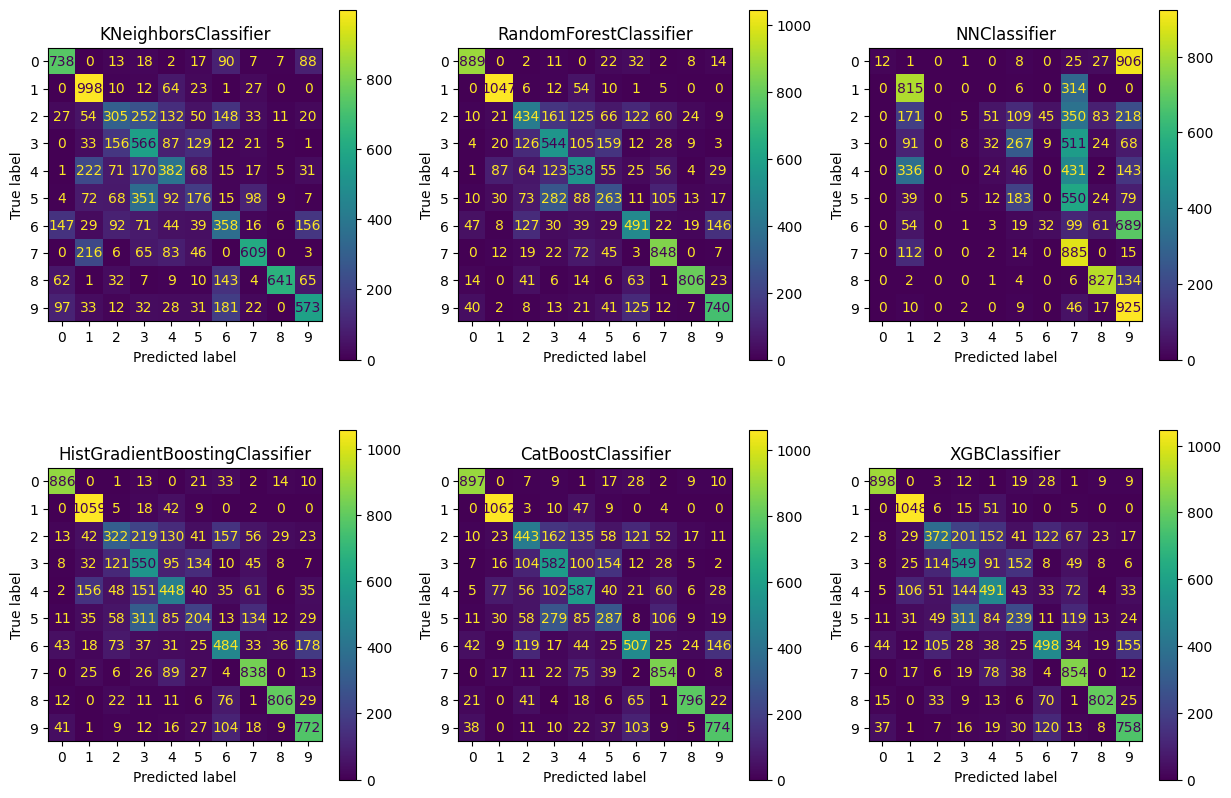

In [40]:
import cvtda.classification

cvtda.classification.classify(train_features, train_labels, test_features, test_labels)

In [41]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

train_features.shape, test_features.shape

((60000, 260), (10000, 260))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.6289, 'TOP-2 Accuracy': 0.7986, 'TOP-3 Accuracy': 0.8833, 'TOP-4 Accuracy': 0.9334, 'TOP-5 Accuracy': 0.9628, 'TOP-6 Accuracy': 0.9787, 'TOP-7 Accuracy': 0.9881, 'TOP-8 Accuracy': 0.9945, 'TOP-9 Accuracy': 0.999, 'AUC-ROC': 0.9217869763314804, 'Precision': 0.616372332631189, 'Recall': 0.6212492975060928, 'F1-score': 0.6142806855461468}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.659, 'TOP-2 Accuracy': 0.8183, 'TOP-3 Accuracy': 0.8973, 'TOP-4 Accuracy': 0.941, 'TOP-5 Accuracy': 0.9674, 'TOP-6 Accuracy': 0.9823, 'TOP-7 Accuracy': 0.99, 'TOP-8 Accuracy': 0.9952, 'TOP-9 Accuracy': 0.9988, 'AUC-ROC': 0.9302833003025244, 'Precision': 0.6490857673149113, 'Recall': 0.6519717535666901, 'F1-score': 0.6484392414924576}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000001BB0B365D80>
Input to LazyLin

100%|██████████| 25/25 [00:34<00:00,  1.39s/it, loss=1.11e+5, val_acc=0.65] 


{'classifier': 'NNClassifier', 'Accuracy': 0.6497, 'TOP-2 Accuracy': 0.8081, 'TOP-3 Accuracy': 0.8806, 'TOP-4 Accuracy': 0.9248, 'TOP-5 Accuracy': 0.9541, 'TOP-6 Accuracy': 0.9704, 'TOP-7 Accuracy': 0.9823, 'TOP-8 Accuracy': 0.9915, 'TOP-9 Accuracy': 0.9963, 'AUC-ROC': 0.9174992552326696, 'Precision': 0.6356521437285472, 'Recall': 0.6408208200702271, 'F1-score': 0.6279871946965628}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.6339, 'TOP-2 Accuracy': 0.8047, 'TOP-3 Accuracy': 0.8851, 'TOP-4 Accuracy': 0.9384, 'TOP-5 Accuracy': 0.9687, 'TOP-6 Accuracy': 0.9842, 'TOP-7 Accuracy': 0.9937, 'TOP-8 Accuracy': 0.9988, 'TOP-9 Accuracy': 0.9993, 'AUC-ROC': 0.9257891887683268, 'Precision': 0.6163668942545409, 'Recall': 0.6261337563417293, 'F1-score': 0.615001998066268}
Fitting <catboost.core.CatBoostClassifier object at 0x000001BB01D4D030>
Learning r

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.6289,0.7986,0.8833,0.9334,0.9628,0.9787,0.9881,0.9945,0.9990,0.921787,0.616372,0.621249,0.614281
1,RandomForestClassifier,0.6590,0.8183,0.8973,0.9410,0.9674,0.9823,0.9900,0.9952,0.9988,0.930283,0.649086,0.651972,0.648439
2,NNClassifier,0.6497,0.8081,0.8806,0.9248,0.9541,0.9704,0.9823,0.9915,0.9963,0.917499,0.635652,0.640821,0.627987
3,HistGradientBoostingClassifier,0.6339,0.8047,0.8851,0.9384,0.9687,0.9842,0.9937,0.9988,0.9993,0.925789,0.616367,0.626134,0.615002
4,CatBoostClassifier,0.6811,0.8341,0.9081,0.9543,0.9756,0.9886,0.9961,0.9987,0.9994,0.939564,0.671785,0.674517,0.670808
5,XGBClassifier,0.6495,0.8183,0.8983,0.9459,0.9725,0.9864,0.9943,0.9989,0.9997,0.932515,0.637137,0.642200,0.635075


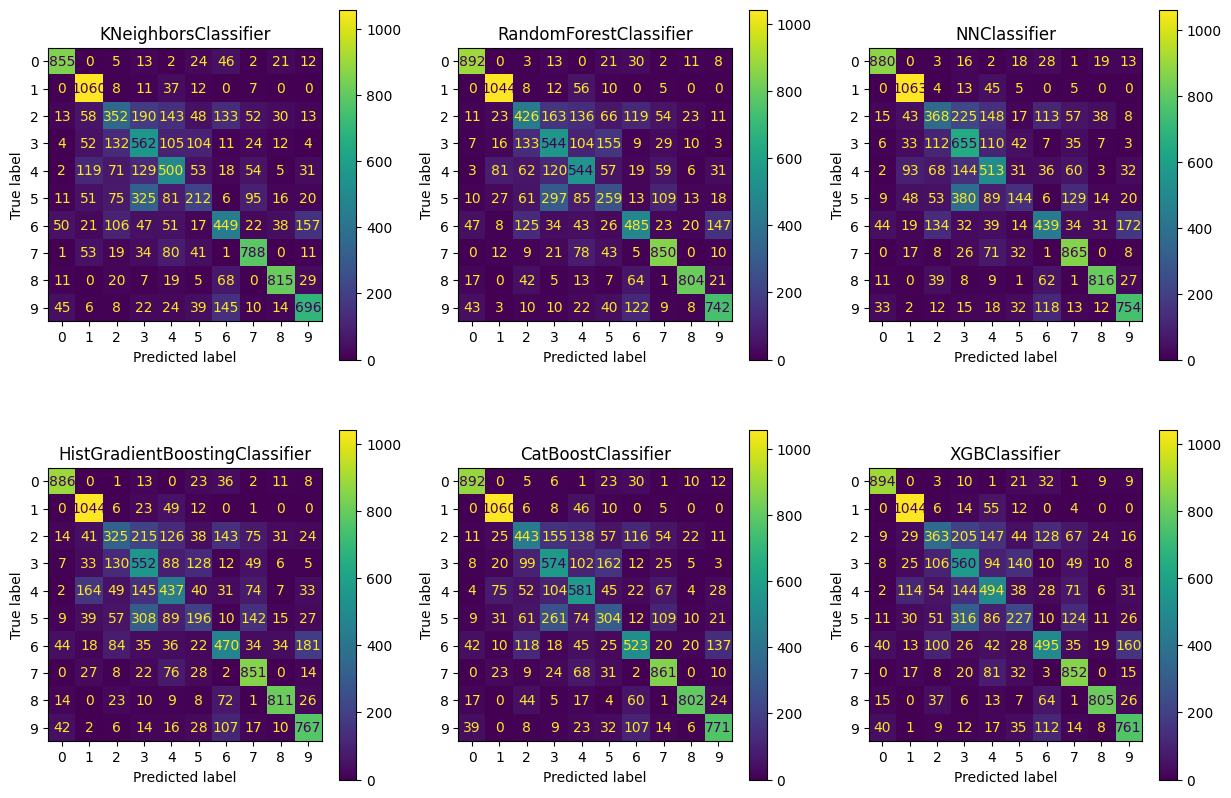

In [42]:
cvtda.classification.classify(train_features, train_labels, test_features, test_labels)